# Data UnderStanding

Pemahaman data sangat penting dalam analisis karena memengaruhi keberhasilan dan ketepatan hasil. Dengan memahami struktur dan karakteristik data, analis dapat mengidentifikasi anomali, pola, serta tren tersembunyi. Eksplorasi awal menentukan apakah data sesuai atau memerlukan preprocessing tambahan seperti penanganan missing values dan normalisasi. Pemahaman yang baik juga membantu memilih metode analisis yang tepat, menghasilkan wawasan yang lebih akurat untuk mendukung pengambilan keputusan berbasis data secara efektif.

## Import Library

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Kode mengimpor tiga pustaka penting untuk analisis dan visualisasi data: pandas untuk manipulasi data dalam bentuk DataFrame, seaborn untuk visualisasi statistik yang informatif, dan matplotlib.pyplot untuk membuat serta menyesuaikan plot. Kombinasi ketiganya memungkinkan eksplorasi dan penyajian data yang lebih jelas serta mendalam.

## 1. Membaca File XLSX dan Konversi Ke CSV

### Membaca File Excel

In [2]:
file_xlsx_mysql = "mysql.xlsx"
file_xlsx_postgres = "postgres.xlsx"

mysql_df = pd.read_excel(file_xlsx_mysql, engine='openpyxl')
postgres_df = pd.read_excel(file_xlsx_postgres, engine='openpyxl')

Kode membaca dua file Excel (mysql.xlsx dan postgres.xlsx) menggunakan pandas dan menyimpannya dalam DataFrame (mysql_df dan postgres_df). Fungsi pd.read_excel() dengan engine='openpyxl' memastikan kompatibilitas dengan format XLSX. Data ini dapat digunakan untuk analisis, perbandingan, atau manipulasi lebih lanjut.

### Menyimpan Sebagai CSV

In [3]:
mysql_df.to_csv("mysql.csv", index=False, encoding='utf-8')
postgres_df.to_csv("postgres.csv", index=False, encoding='utf-8')
print("Data berhasil dikonversi ke CSV.")

Data berhasil dikonversi ke CSV.


Kode mengonversi DataFrame (mysql_df dan postgres_df) menjadi file CSV (mysql.csv dan postgres.csv) menggunakan to_csv() dari pandas. Parameter index=False menghilangkan indeks, dan encoding='utf-8' memastikan dukungan Unicode. Program mencetak pesan sebagai konfirmasi keberhasilan konversi.

## 2. Menggabungkan Data

In [4]:
df_merged = pd.merge(mysql_df, postgres_df, on=['id', 'Class'], how='inner')
df_merged.to_csv("merged_data.csv", index=False)
print("Data berhasil digabungkan.")

Data berhasil digabungkan.


Kode menggabungkan DataFrame mysql_df dan postgres_df berdasarkan kolom id dan Class menggunakan pd.merge() dengan metode inner join. Hasilnya disimpan sebagai merged_data.csv, lalu program mencetak pesan konfirmasi.

## 3. Explorasi Data

### Menampilkan statistik deskriptif untuk melihat ringkasan data

In [5]:
print("\n🔹 Statistik Deskriptif")
print(df_merged.describe())


🔹 Statistik Deskriptif
               id  petal length  petal width  sepal length  sepal width
count  150.000000    150.000000   150.000000    150.000000   150.000000
mean    75.500000      3.758667     1.198667      5.843333     3.054000
std     43.445368      1.764420     0.763161      0.828066     0.433594
min      1.000000      1.000000     0.100000      4.300000     2.000000
25%     38.250000      1.600000     0.300000      5.100000     2.800000
50%     75.500000      4.350000     1.300000      5.800000     3.000000
75%    112.750000      5.100000     1.800000      6.400000     3.300000
max    150.000000      6.900000     2.500000      7.900000     4.400000


Kode menampilkan statistik deskriptif dari df_merged menggunakan describe(), yang mencakup ringkasan data seperti mean, median, min, max, dan quartile untuk kolom numerik.

### Menampilkan informasi dataset seperti tipe data dan missing values

In [6]:
print("\n🔹 Informasi Dataset")
df_merged.info()


🔹 Informasi Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            150 non-null    int64  
 1   Class         150 non-null    object 
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   sepal length  150 non-null    float64
 5   sepal width   150 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Kode menampilkan informasi dataset df_merged menggunakan info(), termasuk jumlah entri, tipe data tiap kolom, serta jumlah nilai non-null di setiap kolom.

### Mengecek jumlah nilai yang hilang di setiap kolom

In [7]:
df_missing = df_merged.isnull().sum()
print("\n🔹 Cek Missing Values")
print(df_missing[df_missing > 0])


🔹 Cek Missing Values
Series([], dtype: int64)


Kode memeriksa missing values di df_merged dengan isnull().sum(), lalu mencetak hanya kolom yang memiliki nilai hilang.

## 4. Visualisasi Data

### Membuat histogram untuk melihat distribusi data

<Figure size 1000x600 with 0 Axes>

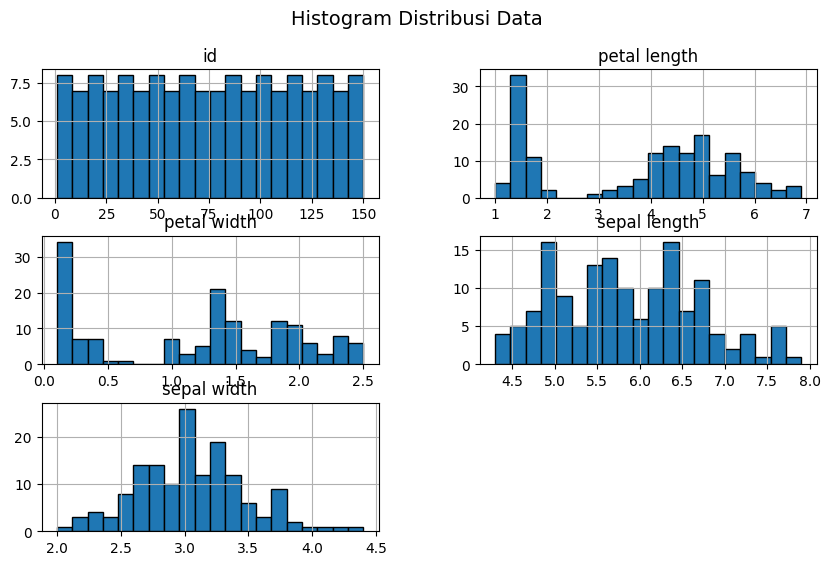

In [8]:
plt.figure(figsize=(10, 6))
df_merged.hist(figsize=(10, 6), bins=20, edgecolor="black")
plt.suptitle("Histogram Distribusi Data", fontsize=14)
plt.show()

Kode membuat histogram untuk melihat distribusi data di df_merged dengan 20 bins. Grafik ditampilkan dengan ukuran 10x6, tepi berwarna hitam, dan judul "Histogram Distribusi Data".

### Membuat boxplot untuk mendeteksi outlier

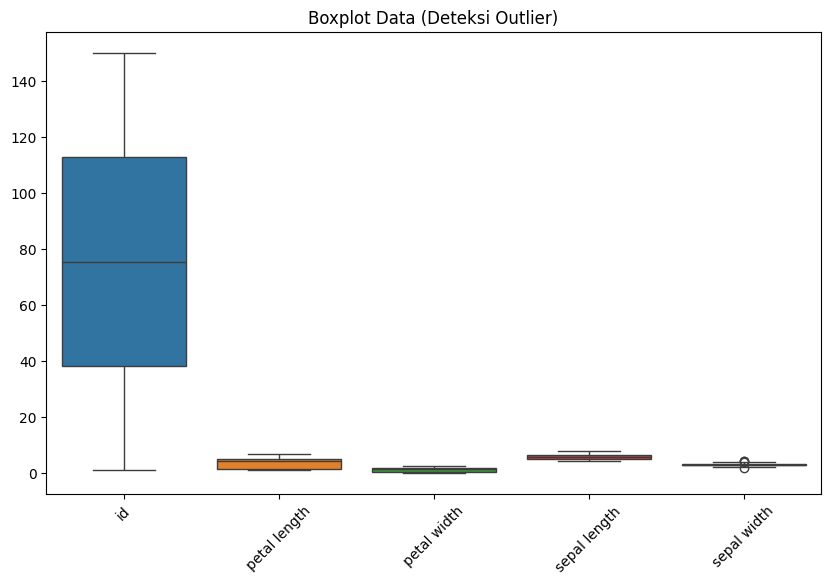

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_merged.select_dtypes(include=['number']))
plt.title("Boxplot Data (Deteksi Outlier)")
plt.xticks(rotation=45)
plt.show()

Kode membuat boxplot untuk mendeteksi outlier pada kolom numerik di df_merged menggunakan Seaborn. Grafik ditampilkan dalam ukuran 10x6, dengan judul dan rotasi label sumbu X agar lebih jelas.

### Membuat heatmap untuk melihat korelasi antar variabel numerik

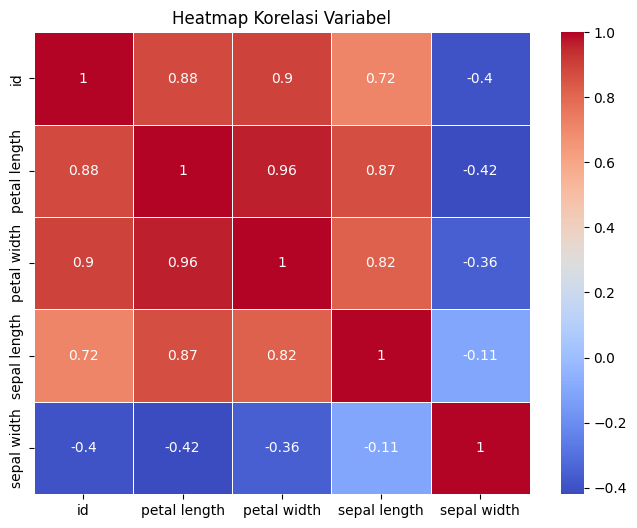

In [10]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_merged.select_dtypes(include=['number']).corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap Korelasi Variabel")
plt.show()

Kode membuat heatmap korelasi untuk kolom numerik di df_merged menggunakan Seaborn, dengan anotasi nilai korelasi, warna "coolwarm", dan garis pemisah 0.5. Grafik membantu melihat hubungan antar variabel.

### Membuat bar chart untuk melihat distribusi kelas

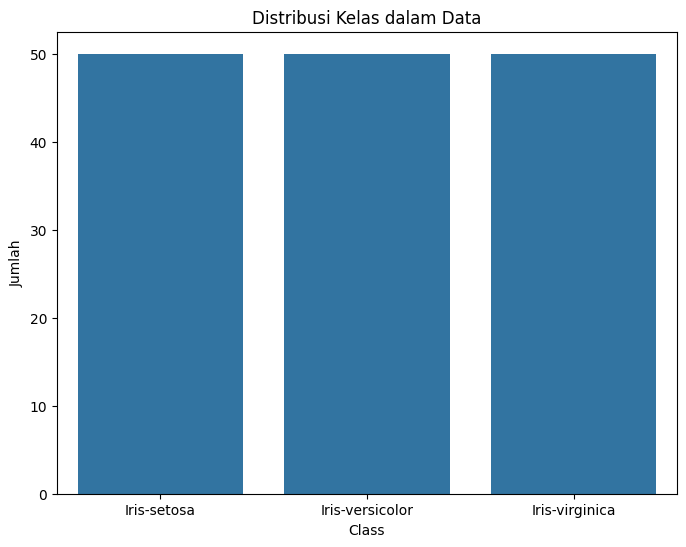

In [11]:
df_class_count = df_merged['Class'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=df_class_count.index, y=df_class_count.values)
plt.title("Distribusi Kelas dalam Data")
plt.xlabel("Class")
plt.ylabel("Jumlah")
plt.show()

Kode membuat barplot untuk menampilkan distribusi kategori pada kolom Class di df_merged. Grafik menunjukkan jumlah setiap kelas, dengan label sumbu X (Class) dan Y (Jumlah).

### Membuat scatterplot untuk melihat hubungan antara dua variabel tertentu

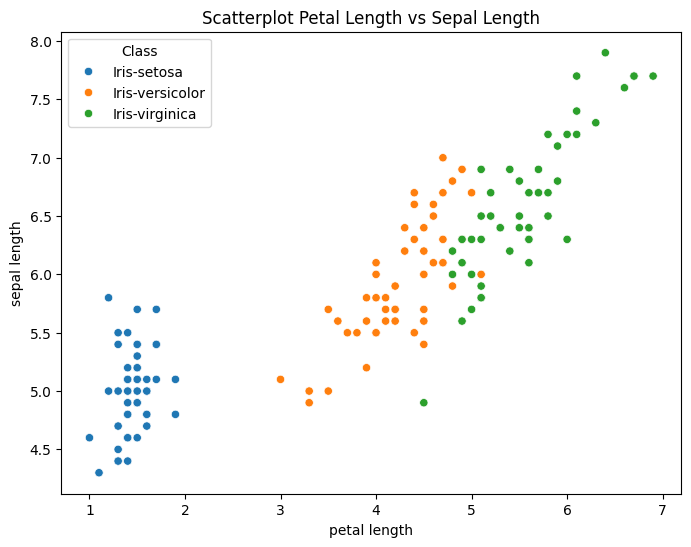

In [12]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="petal length", y="sepal length", hue="Class", data=df_merged)
plt.title("Scatterplot Petal Length vs Sepal Length")
plt.show()

Kode membuat scatterplot yang membandingkan petal length dan sepal length, dengan warna berbeda untuk setiap Class. Grafik membantu melihat pola atau pemisahan antar kelas dalam data.